In [1]:
# $ mkdir -p ~/aiffel/face_embedding
# $ ln -s ~/data ~/aiffel/face_embedding/images

file_list: ['유승호.png', '김수현2.jpg', '유혜진2.jpg', '류승범2.jpg', '이승기2.png', '이승기.jpg', '송중기2.png', '자청.png', '김종민2.jpg', '강동원2.jpg', '남주혁2.jpg', '강동원.jpg', '유혜진.jpg', '김수현.jpg', '육성재2.jpg', '소지섭.jpg', '장훈2.jpg', '상준1.jpg', '류승범.jpg', '공유.jpg', '상준2.jpg', '자청2.jpg', '남주혁.jpeg', '벅보검.jpg', '장훈.jpg', '육성재.jpg', '공유2.jpg', '상준4.jpg', '송중기1.jpg', '상준5.jpg']


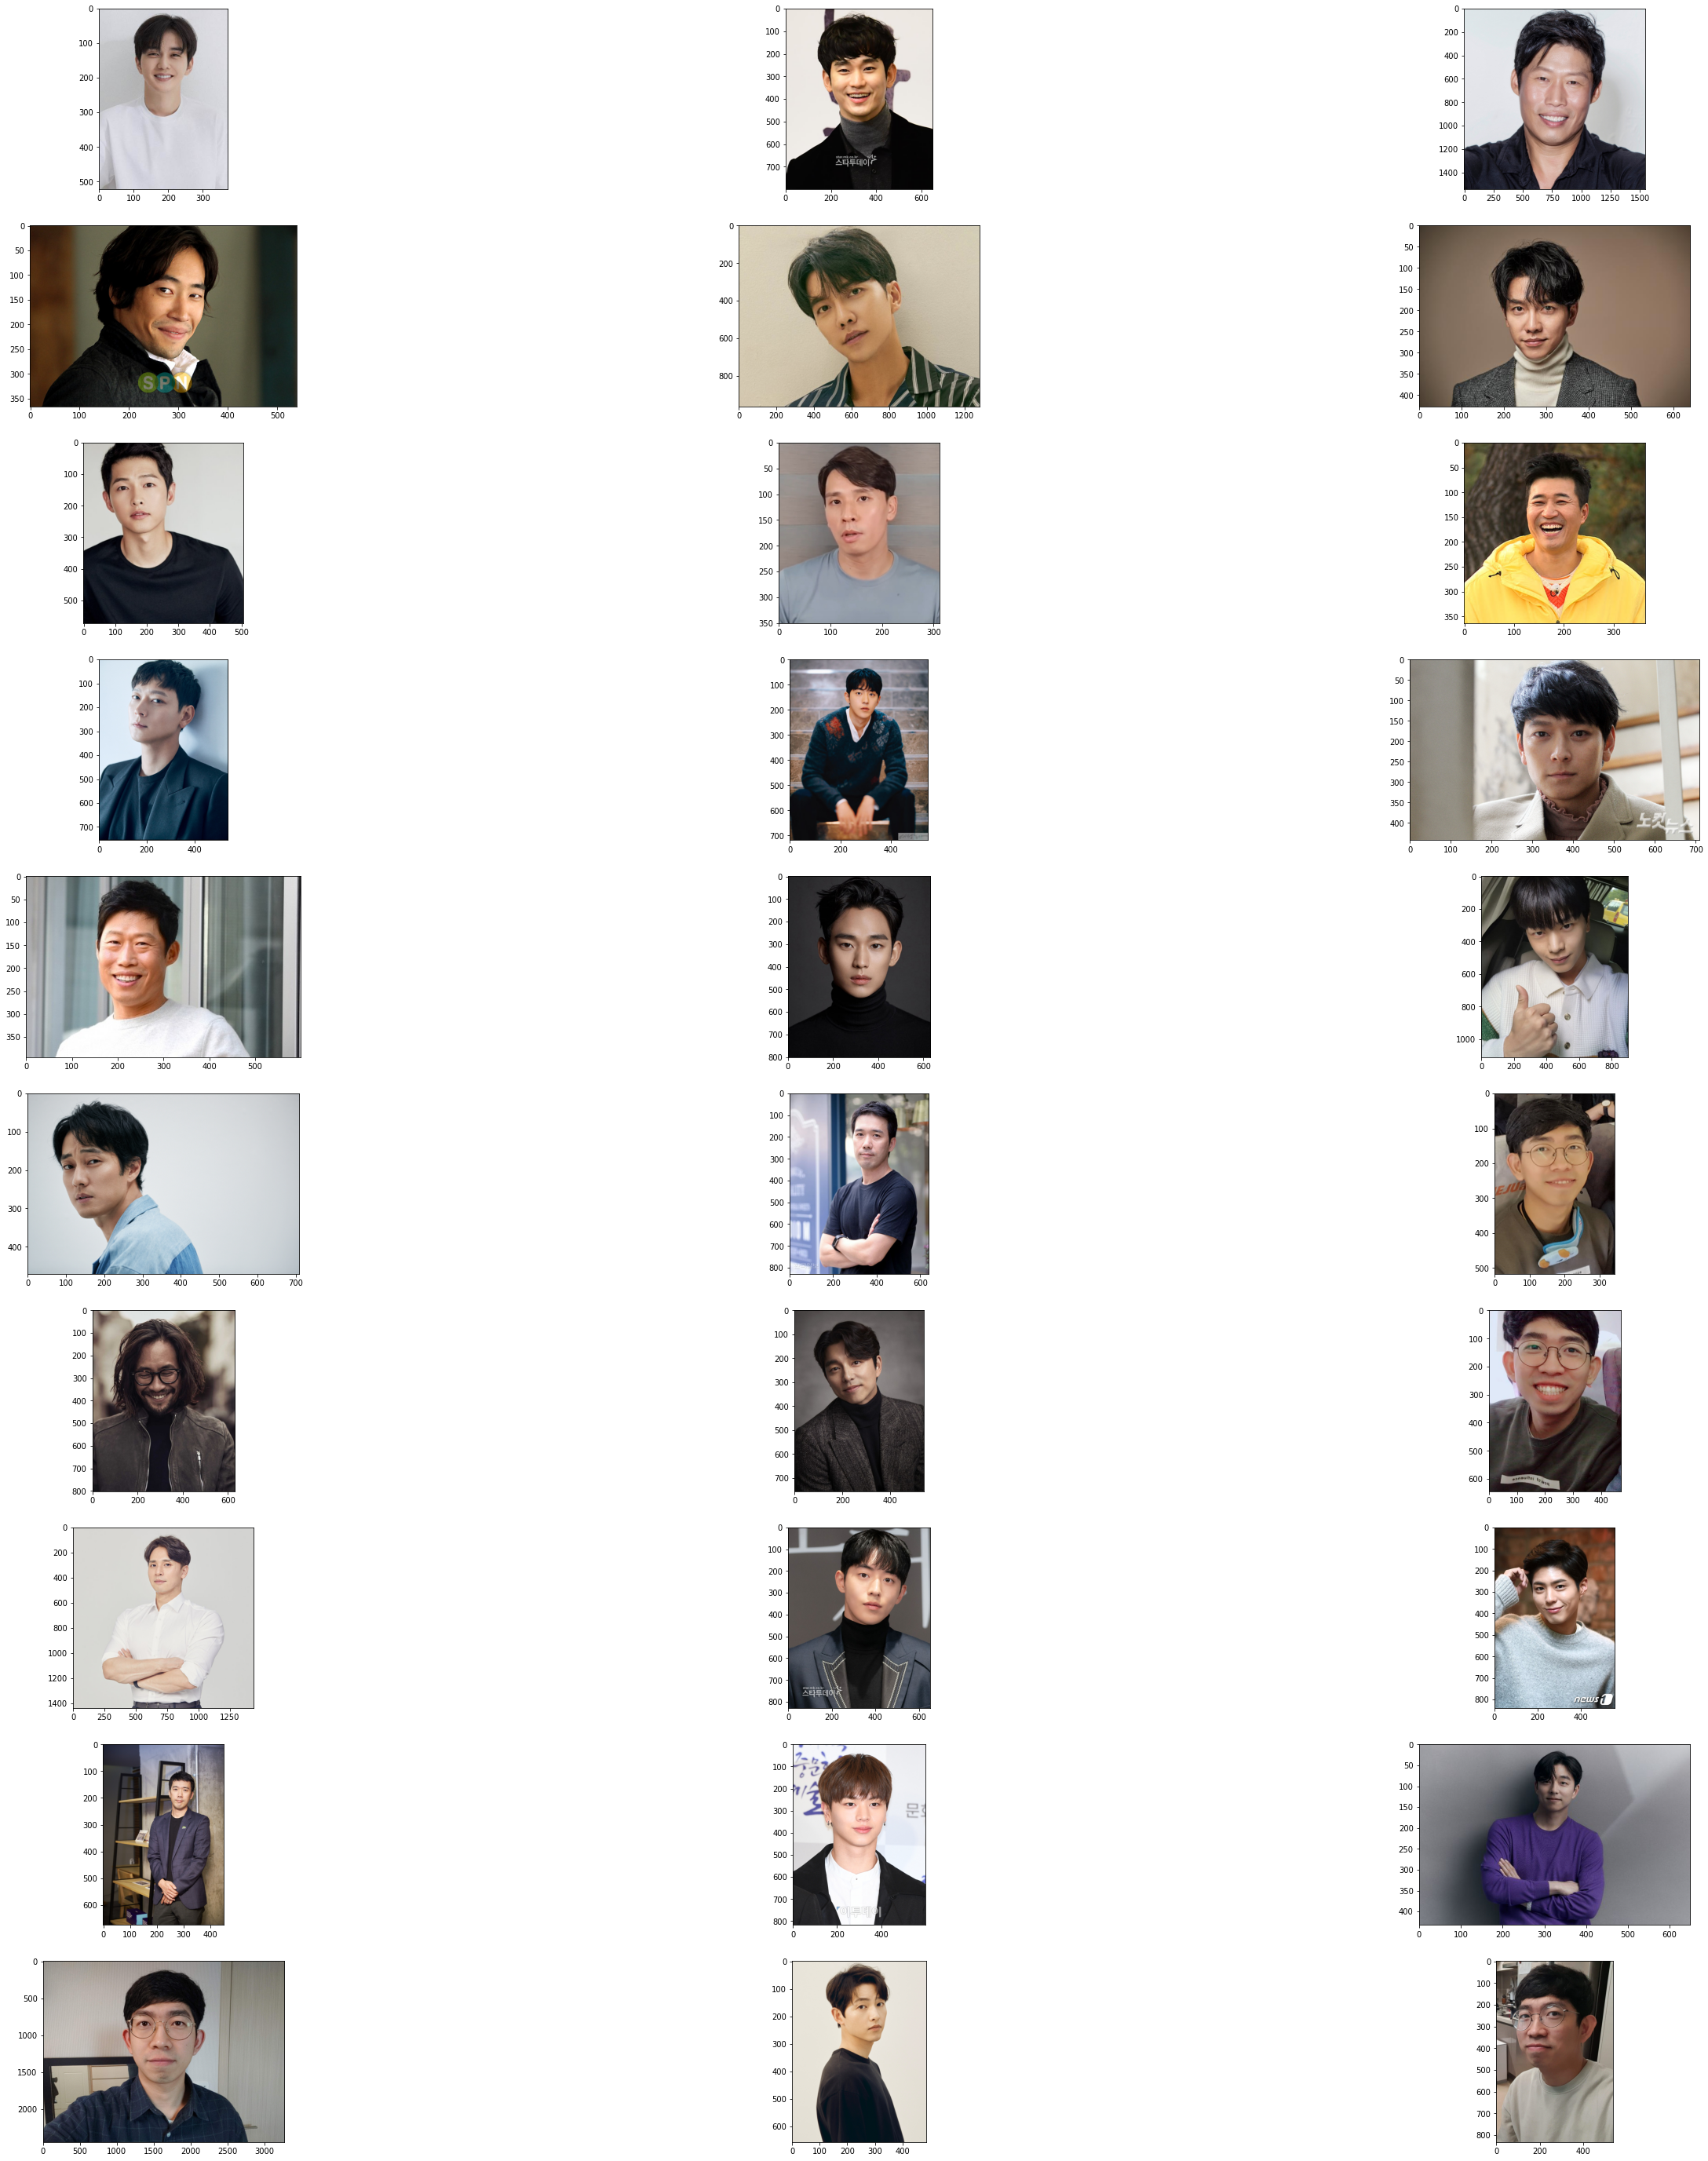

In [2]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/im'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(45,50))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(93, 291, 316, 68)]


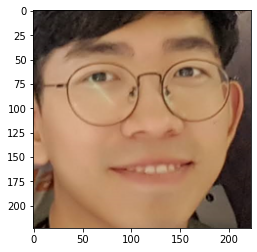

In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/im/상준1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [4]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

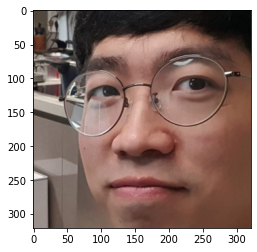

In [29]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/im/상준5.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

1-4

In [6]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/im'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['유승호.png', '김수현2.jpg', '유혜진2.jpg', '류승범2.jpg', '이승기2.png', '이승기.jpg', '송중기2.png', '자청.png', '김종민2.jpg', '강동원2.jpg', '남주혁2.jpg', '강동원.jpg', '유혜진.jpg', '김수현.jpg', '육성재2.jpg', '소지섭.jpg', '장훈2.jpg', '상준1.jpg', '류승범.jpg', '공유.jpg', '상준2.jpg', '자청2.jpg', '남주혁.jpeg', '벅보검.jpg', '장훈.jpg', '육성재.jpg', '공유2.jpg', '상준4.jpg', '송중기1.jpg', '상준5.jpg']


In [7]:
image_file = os.path.join(dir_path, '상준2.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-1.09801762e-01,  9.73611623e-02,  3.00582983e-02, -1.52080525e-02,
        -8.24240595e-02, -1.25458930e-02, -5.98742813e-02, -9.79511589e-02,
         1.10935889e-01, -6.59727603e-02,  1.68445066e-01, -5.35215959e-02,
        -2.50407815e-01, -8.66804272e-02, -7.10812211e-02,  1.93748027e-01,
        -2.01146737e-01, -8.23292881e-02, -7.04758316e-02, -2.13846844e-03,
         1.18324846e-01, -3.25462483e-02,  5.61221875e-02,  2.02782359e-02,
        -4.08768430e-02, -3.90915841e-01, -9.58083272e-02, -9.80944857e-02,
        -1.09622236e-02, -1.47032840e-02, -8.50969553e-02, -1.13721089e-02,
        -1.41497314e-01, -5.30533195e-02, -2.59716064e-04,  4.19931561e-02,
         9.24994517e-03, -5.55316061e-02,  2.21378878e-01,  2.77388468e-03,
        -2.07736284e-01,  6.96784481e-02,  3.91246825e-02,  2.15259448e-01,
         1.99974924e-01,  7.82193467e-02,  5.08266315e-02, -1.30413741e-01,
         1.30418822e-01, -1.62058100e-01,  5.43851852e-02,  1.55580372e-01,
         1.0

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        print(file)
        if file == '.ipynb_checkpoints':
            pass
        else:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict

유승호.png
김수현2.jpg
유혜진2.jpg
류승범2.jpg
이승기2.png
이승기.jpg
송중기2.png
자청.png
김종민2.jpg
강동원2.jpg
남주혁2.jpg
강동원.jpg
유혜진.jpg
김수현.jpg
육성재2.jpg
소지섭.jpg
장훈2.jpg
상준1.jpg
류승범.jpg
공유.jpg
상준2.jpg
자청2.jpg
남주혁.jpeg
벅보검.jpg
장훈.jpg
육성재.jpg
공유2.jpg
상준4.jpg
송중기1.jpg
상준5.jpg


{'유승호': array([-5.20179905e-02,  1.19475648e-01,  1.79449897e-02, -7.66175836e-02,
        -5.26377372e-02, -1.97021477e-02, -9.53520983e-02, -8.75124708e-02,
         1.20267503e-01, -8.44561830e-02,  2.09625334e-01, -6.27880991e-02,
        -1.89434022e-01, -8.15913230e-02, -3.85429561e-02,  1.46937534e-01,
        -1.81064099e-01, -1.64896265e-01, -9.31005925e-04,  2.06459239e-02,
         9.45449397e-02,  5.65518253e-02, -5.18271551e-02,  4.43505533e-02,
        -1.32677898e-01, -3.35082322e-01, -9.64511856e-02, -7.05053508e-02,
        -7.37171099e-02, -2.68030800e-02, -6.88075274e-02,  2.85515394e-02,
        -2.22224444e-01, -6.15223125e-02,  6.58441633e-02,  9.12411436e-02,
        -2.75728405e-02, -2.59755515e-02,  1.50526136e-01,  8.68651643e-03,
        -2.41812453e-01,  1.07449204e-01,  8.99276212e-02,  2.43606597e-01,
         2.09836110e-01,  3.77338231e-02, -2.96151228e-02, -1.55594349e-01,
         1.17398396e-01, -1.69277340e-01,  7.49822408e-02,  1.72964662e-01,
     

1-5

In [10]:
import numpy as np

A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])

B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])

C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

print("슝=3")

슝=3


In [11]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815


In [12]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363


In [13]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In [14]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('상준1', '상준2')

0.3505538305308646

1-7

In [15]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('trump')

In [16]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('상준1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [17]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('상준1',
  array([-1.07498415e-01,  1.52071774e-01, -5.11875786e-02, -4.56855968e-02,
         -1.01780631e-01,  2.66299956e-02, -4.23863158e-02, -7.41074979e-02,
          1.39414877e-01, -1.01904631e-01,  2.01373622e-01, -7.56357890e-03,
         -2.46573985e-01, -8.86343420e-02, -5.54721653e-02,  1.46491647e-01,
         -1.89595610e-01, -1.05910920e-01, -7.33602867e-02, -7.62821827e-03,
          7.88977146e-02, -5.90876024e-03,  6.54998571e-02,  3.32551301e-02,
         -8.06152821e-02, -4.16257232e-01, -7.65904784e-02, -1.25569582e-01,
         -2.44886708e-02, -5.60459569e-02, -2.51690969e-02, -3.81984115e-02,
         -1.68692559e-01, -3.09587773e-02, -4.48793545e-03,  5.48943877e-02,
         -6.19301163e-02, -5.13478136e-03,  2.60653496e-01,  9.83012747e-03,
         -2.01970175e-01,  3.31423394e-02,  5.15853986e-02,  2.81115592e-01,
          2.10109338e-01,  7.01156855e-02,  3.00098285e-02, -1.28459528e-01,
          1.41300991e-01, -1.76403806e-01,  8.54320526e-02,  1.7479

In [18]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('상준1',
  array([-1.07498415e-01,  1.52071774e-01, -5.11875786e-02, -4.56855968e-02,
         -1.01780631e-01,  2.66299956e-02, -4.23863158e-02, -7.41074979e-02,
          1.39414877e-01, -1.01904631e-01,  2.01373622e-01, -7.56357890e-03,
         -2.46573985e-01, -8.86343420e-02, -5.54721653e-02,  1.46491647e-01,
         -1.89595610e-01, -1.05910920e-01, -7.33602867e-02, -7.62821827e-03,
          7.88977146e-02, -5.90876024e-03,  6.54998571e-02,  3.32551301e-02,
         -8.06152821e-02, -4.16257232e-01, -7.65904784e-02, -1.25569582e-01,
         -2.44886708e-02, -5.60459569e-02, -2.51690969e-02, -3.81984115e-02,
         -1.68692559e-01, -3.09587773e-02, -4.48793545e-03,  5.48943877e-02,
         -6.19301163e-02, -5.13478136e-03,  2.60653496e-01,  9.83012747e-03,
         -2.01970175e-01,  3.31423394e-02,  5.15853986e-02,  2.81115592e-01,
          2.10109338e-01,  7.01156855e-02,  3.00098285e-02, -1.28459528e-01,
          1.41300991e-01, -1.76403806e-01,  8.54320526e-02,  1.7479

In [36]:
def get_nearest_face(name, top=23):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [37]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('상준5')

순위 1 : 이름(상준2), 거리(0.3215080746512607)
순위 2 : 이름(상준4), 거리(0.4312277491730892)
순위 3 : 이름(유혜진), 거리(0.44085968520724517)
순위 4 : 이름(이승기), 거리(0.46630880364759114)
순위 5 : 이름(상준1), 거리(0.46636886324563476)
순위 6 : 이름(류승범2), 거리(0.4741267493762253)
순위 7 : 이름(류승범), 거리(0.5031027528888353)
순위 8 : 이름(이승기2), 거리(0.5261369397603686)
순위 9 : 이름(공유2), 거리(0.5430344115653619)
순위 10 : 이름(장훈), 거리(0.5458523581750488)
순위 11 : 이름(유혜진2), 거리(0.549850047940335)
순위 12 : 이름(남주혁), 거리(0.5619686040699127)
순위 13 : 이름(김종민2), 거리(0.5727603531010139)
순위 14 : 이름(송중기2), 거리(0.5801796745586698)
순위 15 : 이름(자청), 거리(0.5818037539948312)
순위 16 : 이름(송중기1), 거리(0.5923262728694495)
순위 17 : 이름(김수현2), 거리(0.598458291908004)
순위 18 : 이름(벅보검), 거리(0.6088118471772807)
순위 19 : 이름(남주혁2), 거리(0.6105231042367845)
순위 20 : 이름(강동원), 거리(0.6234528761071589)
순위 21 : 이름(김수현), 거리(0.6457696133645212)
순위 22 : 이름(육성재), 거리(0.6517126263062809)
순위 23 : 이름(유승호), 거리(0.6597421861035914)


1-8

In [21]:
import face_recognition
import numpy
import PIL

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


Step1. 사진 모으기